Импорт библиотек    

In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


Загрузка и первичный анализ данных

In [41]:
df = pd.read_csv('data/Physical_Activity_Monitoring_unlabeled.csv')

print(f"Размер датасета: {df.shape}")
display(df.head())
display(df.info())
display(df.describe())
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())

Размер датасета: (534601, 53)


,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

None

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000



Количество пропущенных значений:
timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankl

Из первичного анализа данных, можем сделать следующие выводы:
Есть следующие признаки: Сенсоры по локациям: hand, chest, ankle
Температура (Temperature)
Акселерометры (Acc16_, Acc6_)
Гироскопы (Gyro)
Магнитометры (Magne)
Ориентация (Orientation)
Все числовые признаки: float64, один — subject_id (int64).

Есть от 800 до 4000 пропущенных значений на каждый сенсорный блок.

Заполним пропуски медианной, группируя строки по испытуемому

In [42]:
cols_with_nan = df.columns[df.isna().any()].tolist()
for col in cols_with_nan:
    df[col] = (
        df.groupby('subject_id')[col]
          .transform(lambda x: x.fillna(x.median()))
    )


print("\nКоличество пропущенных значений:")
print(df.isnull().sum())


Количество пропущенных значений:
timestamp            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0


Избавимся от мультиколлинеарности, удалив признаки корреляция между которыми > 0.9

In [43]:
corr_features = df
corr_matrix = corr_features.corr()
threshold = 0.9
to_drop = set()

for i, col1 in enumerate(corr_features.columns):
    for j, col2 in enumerate(corr_features.columns):
        if i < j and abs(corr_matrix.iloc[i, j]) > threshold:
            to_drop.add(col2)

df_cleared = corr_features.drop(columns=to_drop)
print(f"Удалено {len(to_drop)} скоррелированных признаков.")

Удалено 7 скоррелированных признаков.


Выведем корреляционную матрицу, после отчистки данных

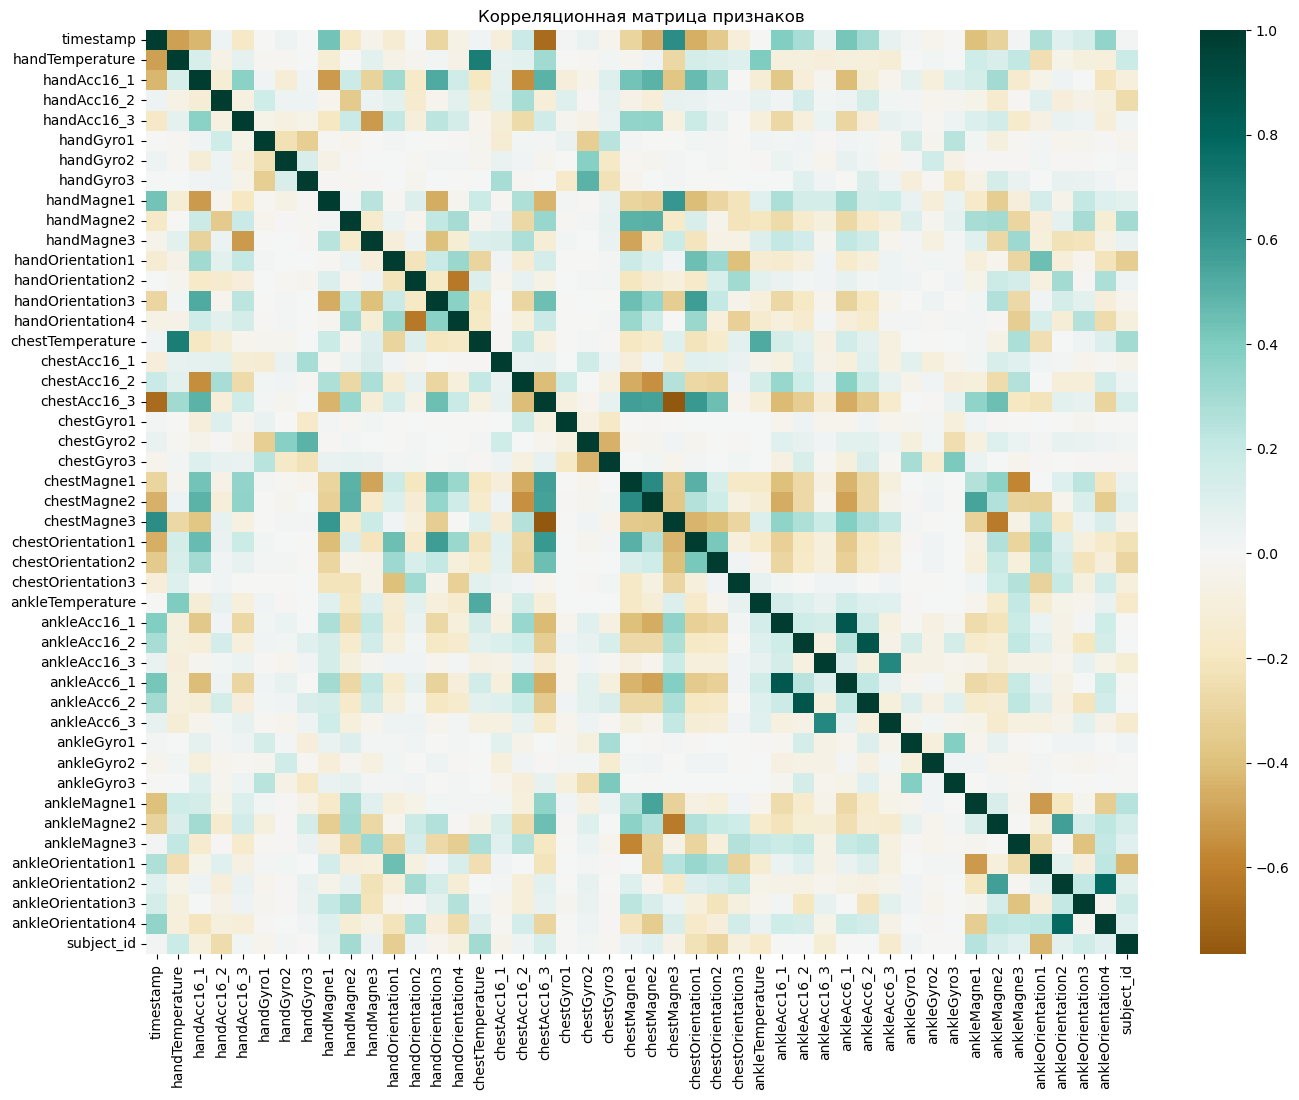

In [44]:
plt.figure(figsize=(16, 12))
corr_matrix = df_cleared.corr()
sns.heatmap(corr_matrix, cmap='BrBG', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

Для большинства алгоритмов кластеризации (например, KMeans) важно, чтобы все признаки были в одной шкале. Поэтому используем MinMaxScaler.

In [45]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleared), columns=df_cleared.columns)



Для оптимизации скорости кода проведем сэмплирование данных

In [46]:
fraction = 0.1

segments = []
for subj_id, group in df_cleared.groupby("subject_id"):
    sampled = group.sample(frac=fraction, random_state=42)
    segments.append(sampled)

df_subsampled = shuffle(pd.concat(segments, ignore_index=True), random_state=42)

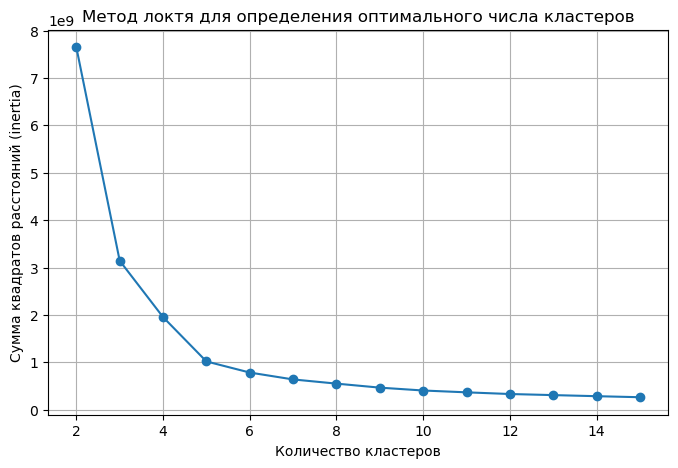

In [47]:
inertia = []
k_values = range(2, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_subsampled)
    inertia.append(kmeans.inertia_)

# Построим график "локтя"
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний (inertia)')
plt.grid(True)
plt.show()

Из графика примерно видно, что на 5-6 кластерах, улучшения сводятся к минимуму. Посчитаем силуэт и отобразим на графике

4 = 0.7602383785004413
5 = 0.7294509506151012
6 = 0.5913222399994466
7 = 0.563593473486213


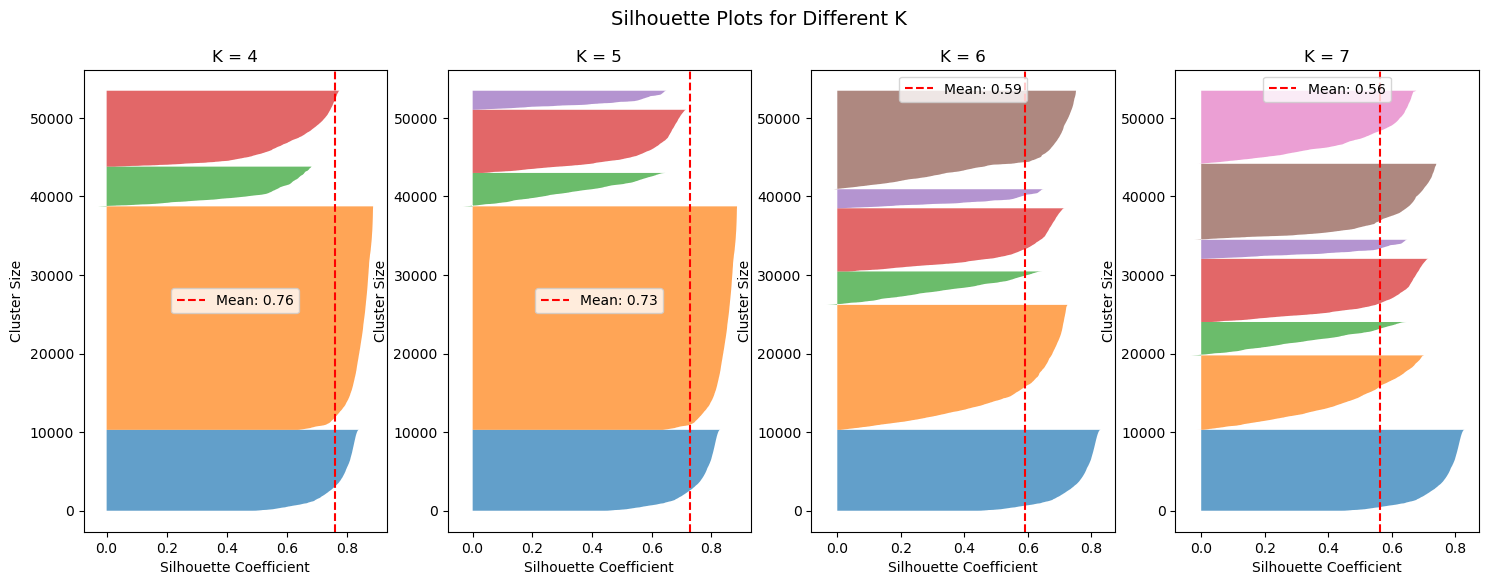

In [48]:
# Функция для построения силуэтных графиков
def plot_silhouette(X, cluster_counts):
    fig, axes = plt.subplots(1, len(cluster_counts), figsize=(18, 6))

    for idx, K in enumerate(cluster_counts):
        kmeans = KMeans(n_clusters=K, random_state=42)
        cluster_labels = kmeans.fit_predict(X)

        # Вычисляем силуэтные коэффициенты
        silhouette_vals = silhouette_samples(X, cluster_labels)
        

        y_lower, y_upper = 0, 0
        axes[idx].set_title(f"K = {K}")
        
        for i in range(K):
            cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
            cluster_silhouette_vals.sort()

            y_upper += len(cluster_silhouette_vals)
            axes[idx].fill_betweenx(
                np.arange(y_lower, y_upper), 
                0, 
                cluster_silhouette_vals, 
                alpha=0.7
            )
            y_lower = y_upper
        
        # Средний силуэтный коэффициент
        avg_score = silhouette_score(X, cluster_labels)
        print(f'{K} = {avg_score}')
        axes[idx].axvline(avg_score, linestyle="--", color="red", label=f"Mean: {avg_score:.2f}")
        axes[idx].legend()
        axes[idx].set_xlabel("Silhouette Coefficient")
        axes[idx].set_ylabel("Cluster Size")
    
    plt.suptitle("Silhouette Plots for Different K", fontsize=14)
    plt.show()

# Вызываем функцию для K=4, 5, 6, 7
plot_silhouette(df_subsampled, cluster_counts=[4, 5, 6, 7])

С точки зрения метрик, K=4 даёт лучший силуэт. Но визуально видно, что кластеры неравномерны, и один слишком большой. K=7 даёт более равные кластеры и чистую сегментацию, хоть и с меньшим силуэтом.
При этом можно заметить, что K=6 выглядит наиболее сбалансированным как по длинне, так и по ширине силуэтов.

Попробуем также найти кластеры с помощью DBSCAN

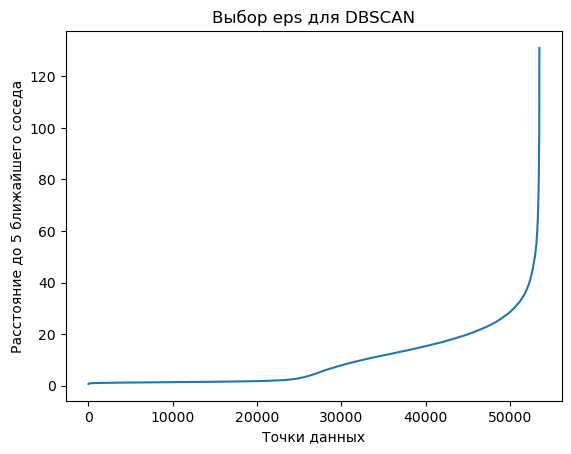

In [49]:
segments = []
for subj_id, group in df_cleared.groupby("subject_id"):
    sampled = group.sample(frac=fraction, random_state=42)
    segments.append(sampled)

df_subsampled = shuffle(pd.concat(segments, ignore_index=True), random_state=42)
nbrs = NearestNeighbors(n_neighbors=3, n_jobs=10).fit(df_subsampled)
distances, _ = nbrs.kneighbors(df_subsampled)

# Берем 5-е расстояние, сортируем и строим график
distances = np.sort(distances[:, 2])
plt.plot(distances)
plt.xlabel("Точки данных")
plt.ylabel("Расстояние до 5 ближайшего соседа")
plt.title("Выбор eps для DBSCAN")
plt.show()

Из графика видно, "настоящий локоть" находится скорее около eps = 1.5–3.0.

In [51]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(df_subsampled)
score_dbscan = silhouette_score(df_subsampled, labels)

print(f'Score DBSCAN: {score_dbscan}')

Score DBSCAN: -0.5810021760110905


Видим, что DBSCAN дает отрицательный результат, а значит модель не справляется с поставленной задачей.

Для итогового реузльтата будем исползовать KMean с 6 кластерами

In [ ]:
clasters_num = 6
model = KMeans(n_clusters=clasters_num)

clusters = model.fit_predict(df_scaled)
df_scaled['cluster'] = clusters
df_scaled['activityID'] = -1
dict = {}
activityID = 1
for index, row in df_scaled.iterrows():
    if row['cluster'] in dict.keys():
        df_scaled.loc[index, 'activityID'] = dict[row['cluster']]
    else:
        dict[row['cluster']] = activityID
        df_scaled.loc[index, 'activityID'] = activityID
        activityID += 1


submission = df_scaled[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission.csv', index=False)

Скриншот с Kaggle
![](image.png)